In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import matplotlib
import numpy as np

from sklearn.preprocessing import LabelEncoder, LabelBinarizer

matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [186]:
test_data_path = 'data/test.csv'
train_data_path = 'data/train.csv'

### 1) Take a look at the raw data using a pandas dataframe:

In [366]:
raw_train_data = pd.read_csv(train_data_path)
raw_test_data = pd.read_csv(test_data_path)
raw_train_data.head(5)

,Unnamed: 0,v0,v1,v2,v3,v4,v5,v6,v7,v8,...,v556,v557,v558,v559,v560,v561,v562,v563,v564,label
0,0,0,f,-0.132905,-0.995279,-0.983111,0,-0.995112,-0.983185,-0.923527,...,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,A,0.288585,-0.913526,-0.020294,2
1,1,1,f,-0.123520,-0.998245,-0.975300,0,-0.998807,-0.974914,-0.957686,...,-0.732626,0.703511,-0.844788,0.180289,-0.054317,A,0.278419,-0.960322,-0.016411,2
2,2,2,f,-0.113462,-0.995380,-0.967187,0,-0.996520,-0.963668,-0.977469,...,0.100699,0.808529,-0.848933,0.180637,-0.049118,A,0.279653,-0.978944,-0.019467,2
3,3,3,f,-0.123283,-0.996091,-0.983403,0,-0.997099,-0.982750,-0.989302,...,0.640011,-0.485366,-0.848649,0.181935,-0.047663,A,0.279174,-0.990675,-0.026201,2
4,4,4,f,-0.115362,-0.998139,-0.980817,0,-0.998321,-0.979672,-0.990441,...,0.693578,-0.615971,-0.847865,0.185151,-0.043892,A,0.276629,-0.990482,-0.016570,2


### 2) Further check how many categories in the train and test data

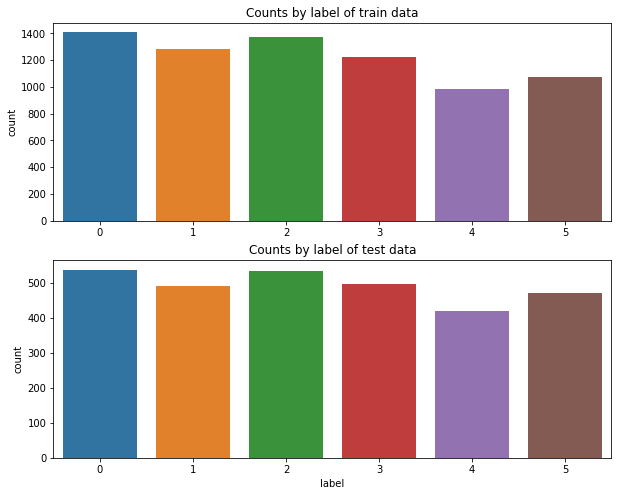

In [188]:
_,ax=plt.subplots(2)
sbn.countplot(x='label', data=raw_train_data, ax = ax[0])
sbn.countplot(x='label', data=raw_test_data, ax = ax[1])
ax[0].set_title('Counts by label of train data')
ax[0].set_xlabel('')
ax[1].set_title('Counts by label of test data')
ax[0].set_xlabel('');

## Encoding non-numeric features

Now take a look of non-numeric data coloumns:

In [189]:
raw_train_data.select_dtypes(exclude=['float','int']).describe()

,v1,v561
count,7352,7352
unique,6,21
top,d,Y
freq,1407,409


In [190]:
raw_test_data.select_dtypes(exclude=['float','int']).describe()

,v1,v561
count,2947,2947
unique,6,9
top,d,X
freq,524,381


It shows v1 and v561 are the only two columns with non-numeric values. Let's take a close look:

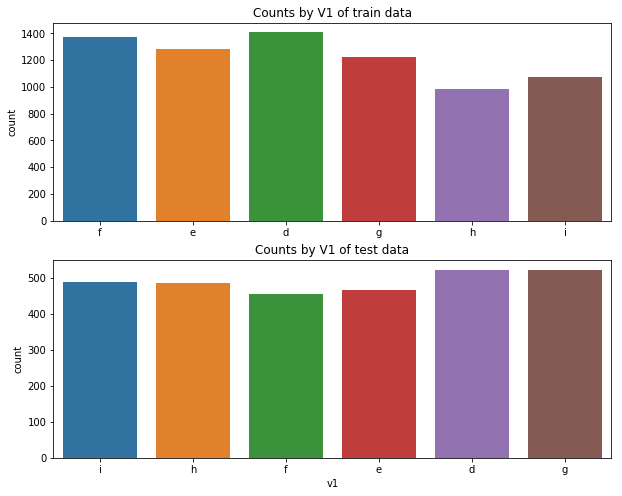

In [191]:
_,ax=plt.subplots(2)
sbn.countplot(x='v1', data=raw_train_data, ax = ax[0])
sbn.countplot(x='v1', data=raw_test_data, ax = ax[1])
ax[0].set_title('Counts by V1 of train data')
ax[0].set_xlabel('')
ax[1].set_title('Counts by V1 of test data')
ax[0].set_xlabel('');

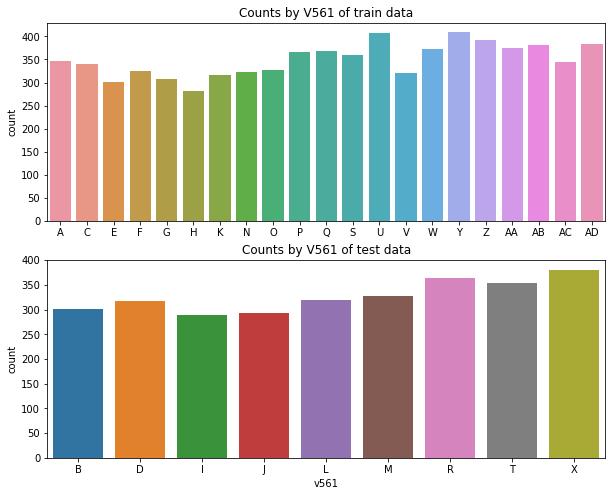

In [192]:
_,ax=plt.subplots(2)
sbn.countplot(x='v561', data=raw_train_data, ax = ax[0])
sbn.countplot(x='v561', data=raw_test_data, ax = ax[1])
ax[0].set_title('Counts by V561 of train data')
ax[0].set_xlabel('')
ax[1].set_title('Counts by V561 of test data')
ax[0].set_xlabel('');

As v561 has different categories in the train and test sets, this feature is dropped. On the other hand, v1 can be binarize encoded.

In [367]:
raw_train_data.drop(columns=raw_train_data.columns[[0,1]],inplace=True)
raw_test_data.drop(columns=raw_test_data.columns[[0,1]],inplace=True)
raw_train_data.drop(columns=['v561'],inplace=True)
raw_test_data.drop(columns=['v561'],inplace=True)

In [368]:
lbenc = LabelBinarizer()
v1_train_binary = lbenc.fit_transform(raw_train_data.v1)
v1_test_binary = lbenc.transform(raw_test_data.v1)
v1_category = lbenc.classes_

for i, cat in enumerate(v1_category):
    raw_train_data['v1_'+cat] = v1_train_binary[:,i]
    raw_test_data['v1_'+cat] = v1_test_binary[:,i]
    
raw_train_data.drop(columns=['v1'],inplace=True)
raw_test_data.drop(columns=['v1'],inplace=True)

## Deal with nan values

In [289]:
raw_train_data.loc[raw_train_data.isna().any(axis=1),raw_train_data.isna().any(axis=0)].describe()

,v8,v10,v11,v12,v13,v14,v15,v16,v17,v18
count,77.000000,71.000000,62.000000,73.000000,66.000000,59.000000,58.000000,77.000000,74.000000,77.000000
mean,-0.739423,-0.373939,-0.621777,0.633491,0.454882,0.697277,-0.724786,-0.897984,-0.933623,-0.913015
std,0.329816,0.245066,0.237654,0.341129,0.315790,0.224955,0.388105,0.171011,0.099321,0.123740
min,-0.999316,-0.579196,-0.831265,-0.306237,-0.228288,-0.038883,-0.999004,-0.999996,-0.999983,-1.000000
25%,-0.991111,-0.571139,-0.819212,0.353946,0.129204,0.464706,-0.995004,-0.999979,-0.999920,-0.999787
50%,-0.960828,-0.531190,-0.790353,0.843648,0.666047,0.830569,-0.974906,-0.999904,-0.999136,-0.998242
75%,-0.363082,-0.107552,-0.385963,0.849265,0.688624,0.840576,-0.261229,-0.789177,-0.865844,-0.792232
max,0.035654,0.196827,-0.099875,0.854270,0.695290,0.861045,0.116705,-0.257503,-0.711663,-0.489898


In [216]:
raw_test_data.loc[raw_test_data.isna().any(axis=1),raw_test_data.isna().any(axis=0)].describe()

,v9,v11,v12
count,32.000000,24.000000,32.000000
mean,-0.576350,-0.616086,0.651963
std,0.433808,0.205460,0.261655
min,-0.945673,-0.820055,0.152912
25%,-0.934578,-0.792156,0.380215
50%,-0.856601,-0.738037,0.827531
75%,-0.259721,-0.388833,0.842632
max,0.551623,-0.280410,0.853552


In [365]:
# raw_test_data.loc[raw_test_data.isna().any(axis=1),raw_test_data.isna().any(axis=0)].describe()

# raw_train_nan_col = raw_train_data.columns[raw_train_data.isna().any(axis=0)].values
# raw_test_nan_col = raw_test_data.columns[raw_test_data.isna().any(axis=0)].values
# drop_col = ([col for col in raw_test_nan_col]+[col for col in raw_train_nan_col] + ['label'])

# X_train = raw_train_data.loc[:,[col for col in raw_train_data.columns if col not in drop_col]]
# y_train = raw_train_data.loc[:,['label']]
# X_test = raw_test_data.loc[:,[col for col in raw_test_data.columns if col not in drop_col]]
# y_test = raw_test_data.loc[:,['label']]

In [369]:
from sklearn.preprocessing import Imputer
imp = Imputer(strategy='mean')

X_train = raw_train_data.loc[:,[col for col in raw_train_data.columns if col not in ['label']]]
X_train.loc[:,:] = imp.fit_transform(X_train)
y_train = raw_train_data.loc[:,['label']]
X_test = raw_test_data.loc[:,[col for col in raw_test_data.columns if col not in ['label']]]
X_test.loc[:,:] = imp.transform(X_test)
y_test = raw_test_data.loc[:,['label']]

## Random Forest

In [199]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [395]:
rfc = RandomForestClassifier(n_estimators=50,
                             criterion = 'entropy',
                             n_jobs=-1,
                             random_state=0,
                             max_depth=6)
rfc.fit(X_train, np.ravel(y_train))
print classification_report(y_test,rfc.predict(X_test))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       537
          1       0.83      0.83      0.83       491
          2       0.84      0.84      0.84       532
          3       0.88      0.96      0.92       496
          4       0.96      0.79      0.87       420
          5       0.88      0.92      0.90       471

avg / total       0.90      0.90      0.89      2947



Check the performance in trainging:

In [393]:
print classification_report(y_train,rfc.predict(X_train))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1407
          1       1.00      0.98      0.99      1286
          2       0.98      1.00      0.99      1374
          3       0.99      1.00      0.99      1226
          4       1.00      0.98      0.99       986
          5       0.99      1.00      1.00      1073

avg / total       0.99      0.99      0.99      7352



10 most influential featuers in RF:

In [394]:
print X_test.columns[np.argsort(rfc.feature_importances_)[-10:]]

Index([u'v53', u'v1_i', u'v559', u'v40', u'v52', u'v56', u'v1_d', u'v1_f',
       u'v558', u'v1_e'],
      dtype='object')


# SVM

In [280]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [372]:
scaler = StandardScaler()
X_train.loc[:,:] = scaler.fit_transform(X_train)
X_test.loc[:,:] = scaler.transform(X_test)

In [374]:
svc = SVC(C = 0.1,
          random_state=0,
          class_weight = 'balanced')
svc.fit(X_train, np.ravel(y_train))
print classification_report(y_test,svc.predict(X_test))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       537
          1       0.78      0.80      0.79       491
          2       0.83      0.79      0.81       532
          3       0.91      0.95      0.93       496
          4       0.90      0.87      0.88       420
          5       0.93      0.92      0.93       471

avg / total       0.89      0.89      0.89      2947



In [296]:
svc.get_params

<bound method SVC.get_params of SVC(C=0.1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)>

In [297]:
print classification_report(y_train,svc.predict(X_train))

             precision    recall  f1-score   support

          0       1.00      0.98      0.99      1407
          1       1.00      1.00      1.00      1286
          2       1.00      1.00      1.00      1374
          3       1.00      0.98      0.99      1226
          4       0.94      1.00      0.97       986
          5       1.00      0.98      0.99      1073

avg / total       0.99      0.99      0.99      7352



In [273]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
skf = StratifiedKFold(n_splits= 2, shuffle = True,random_state=0)
# tuned_parameters = [{'C': [1e3, 5e3, 1e4, 5e4, 1e5], 
#                      'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]}]
tuned_parameters = [{'C': [0.1],
                    'gamma':[0.001,0.01,0.1,1]}]
clf = GridSearchCV(SVC(), tuned_parameters, cv=skf, n_jobs=-1)
clf.fit(X_train,np.ravel(y_train))

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=0, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'C': [0.1], 'gamma': [0.001, 0.01, 0.1, 1]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [274]:
clf.best_params_

{'C': 0.1, 'gamma': 0.001}

In [275]:
print classification_report(y_test,clf.predict(X_test))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00       537
          1       0.79      0.80      0.79       491
          2       0.82      0.80      0.81       532
          3       0.88      0.98      0.93       496
          4       0.97      0.81      0.88       420
          5       0.91      0.94      0.92       471

avg / total       0.89      0.89      0.89      2947



In [257]:
print classification_report(y_train,clf.predict(X_train))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1407
          1       1.00      1.00      1.00      1286
          2       1.00      1.00      1.00      1374
          3       1.00      1.00      1.00      1226
          4       1.00      1.00      1.00       986
          5       1.00      1.00      1.00      1073

avg / total       1.00      1.00      1.00      7352



Polynomial kernal

In [238]:
svc = SVC(kernel='poly',degree=5)
svc.fit(X_train, np.ravel(y_train))
print classification_report(y_test,svc.predict(X_test))

             precision    recall  f1-score   support

          0       1.00      0.92      0.96       537
          1       0.83      0.66      0.74       491
          2       0.71      0.86      0.78       532
          3       0.71      0.98      0.83       496
          4       0.96      0.66      0.78       420
          5       0.90      0.85      0.87       471

avg / total       0.85      0.83      0.83      2947



In [245]:
print classification_report(y_train,svc.predict(X_train))

             precision    recall  f1-score   support

          0       1.00      0.99      0.99      1407
          1       1.00      0.99      0.99      1286
          2       0.99      0.99      0.99      1374
          3       0.95      1.00      0.97      1226
          4       1.00      0.92      0.96       986
          5       0.96      1.00      0.98      1073

avg / total       0.98      0.98      0.98      7352



## PCA

In [396]:
X_train = raw_train_data.loc[:,[col for col in raw_train_data.columns if col not in ['label']]]
X_train.loc[:,:] = imp.fit_transform(X_train)
y_train = raw_train_data.loc[:,['label']]
X_test = raw_test_data.loc[:,[col for col in raw_test_data.columns if col not in ['label']]]
X_test.loc[:,:] = imp.transform(X_test)
y_test = raw_test_data.loc[:,['label']]

In [398]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [407]:
pca = PCA()
svc = SVC(kernel='rbf', C=0.1)
scaler = StandardScaler()
skf = StratifiedKFold(n_splits= 5, shuffle = True,random_state=0)

steps = [('scaler',scaler),('pca',pca),('svc',svc)]
pipe = Pipeline(steps)
grid_parameters = {'pca__n_components': [10,100,500]}
estimator = GridSearchCV(pipe, param_grid= grid_parameters, cv = skf, n_jobs=-1)
estimator.fit(X_train, np.ravel(y_train))
print estimator.best_params_

{'pca__n_components': 500}


In [410]:
predict = estimator.best_estimator_.predict(X_test)

In [412]:
print classification_report(y_test, predict)

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       537
          1       0.78      0.80      0.79       491
          2       0.83      0.80      0.81       532
          3       0.90      0.95      0.93       496
          4       0.90      0.86      0.88       420
          5       0.93      0.92      0.93       471

avg / total       0.89      0.89      0.89      2947

